# Analysis of breast cancer data using machine learning models
## This code is intended only for educational purposes about ML techniques
## Author: Gustavo H. Migliorini

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users/Gustavo/Documents/GitHub/Machine-Learning-Ciencia-de-Dados-UTFPR/datasets/breast_cancer.csv")

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Looking to dataset we can see that we need to make some cleaning before moving on. For example, we don't need the first and last columns. Before starting the cleaning, let's check all the column names, because only 20 were displayed above.

In [4]:
list(df.columns)

['id',
 'diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst',
 'Unnamed: 32']

Except columns 1, 2 and 33, all the others are quantitative variables characterizing breast thumors. So, we need to subset these variables and take only the values to an array X. 
Column 2 (diagnosis) is the label for the cancer type (malignant or benign) and will be mapped to 0 and 1 in an y array.

In [5]:
df_clean = df.drop(['id', 'diagnosis', 'Unnamed: 32'], axis=1)
X = df_clean.values
print(X.shape)

(569, 30)


The X subset has 569 rows and 30 columns.

In [6]:
X[:5, :5]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01],
       [1.142e+01, 2.038e+01, 7.758e+01, 3.861e+02, 1.425e-01],
       [2.029e+01, 1.434e+01, 1.351e+02, 1.297e+03, 1.003e-01]])

Now, let's create the y subset which contains the class labels for cancer type. One way to do that is map the classes in the original dataset and then take the values as an array. I will give 0 to Benign (B) and 1 to Malignant (M).

In [7]:
labels = {'M': 1, 'B': 0}

df['diag_class'] = df['diagnosis'].map(labels)

In [8]:
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,diag_class
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN,1
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN,1
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN,1
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN,1
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN,0


Column 'diagnosis' will be the classifier, so it's important to check how balanced are the classes)

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

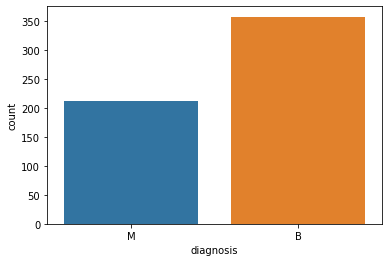

In [9]:
sns.countplot(data = df, x = 'diagnosis')

We can see that the classes are not well balanced

In [10]:
y = df['diag_class'].values
y[:30]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

So, we have the X and y subsets. Now, it's time to split the data into train and test subsets and to that we can use the Sckit-Learn library which contains all the necessary tools for Ml modelling.

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123, shuffle=True)

70% of data for trainning and 30% for testing

In [12]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(398, 30) (398,)
(171, 30) (171,)


Next step is submit the train datasets to the learning algorithm, however it's important to standardize the data in order to avoid bias due to scaling. To do that we may z-score-transform the data (mean = 0, sd = 1). 

In [13]:
from sklearn.preprocessing import StandardScaler

scl = StandardScaler()
scl.fit(X_train)
X_train_std = scl.transform(X_train)
X_test_std = scl.transform(X_test)

So, we have a standardized dataset and we can move on to the learning algorithm

In [14]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_std, y_train)

KNeighborsClassifier(n_neighbors=3)

Learning agorithm, done! We can now make predictions on the test dataset

In [15]:
y_pred = knn_model.predict(X_test_std)

That's it! Let's check how good was the model (based on all those thumor characteristics) to predict breast cancer type, that is, benign or malignant.

In [16]:
num_correct_predictions = (y_pred == y_test).sum()
accuracy = (num_correct_predictions/y_test.shape[0]) * 100
print('Model accuracy: %.2f%%' % accuracy)

Model accuracy: 98.83%


Yes, that's a high accuracy. However, remember the classes are highly imbalanced which means the model accuracy may probably be biased by class distribution. Another way to look at the results is through a confusion matrix or a classification report

In [18]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))

[[103   0]
 [  2  66]]


Basically, the model was able to predict 103 true benign cases and 0 false malignant cases. The model predicted only 2 false benign cases and 66 true malignant cases. 

In [19]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       103
           1       1.00      0.97      0.99        68

    accuracy                           0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171



## A more pragmatic approach for choosing the number of neighbors in the kNN classifier could be looking at the difference between accuracy of train and test data with different neighbors, and then choose the one where difference is lower

In [20]:
import matplotlib.pyplot as plt

# lists where kNNs for a range of n_neighbors will be stored
training_accuracy = []
test_accuracy = []

# n_neighbors from 1 to 20
neighbors_qty = range(1,20)

# for each n_neighbor, run kNN and store values in the lists
for i in neighbors_qty:
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    training_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))

In [21]:
difference = []

zip_object = zip(training_accuracy, test_accuracy)
for training_accuracy_i, test_accuracy_i in zip_object:
    difference.append(training_accuracy_i - test_accuracy_i)

print(difference)

[0.07017543859649122, 0.012386493872873161, 0.020747009903317792, 0.025772135531458518, 0.012386493872873161, 0.018234447089247485, 0.018234447089247485, 0.036601134326603835, 0.0015134150283582226, 0.0240824003056217, 0.018234447089247485, 0.024905227893855297, 0.010696758647036453, 0.016544711863410666, 0.016544711863410666, 0.016544711863410666, 0.016544711863410666, 0.014032149049340248, 0.008184195832966035]


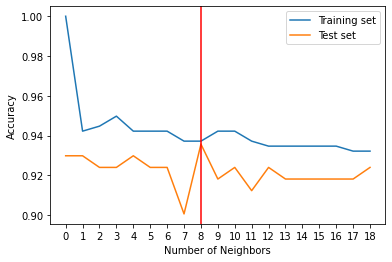

In [22]:
diff_array = np.array(difference)

plt.plot(neighbors_qty,training_accuracy, label='Training set')
plt.plot(neighbors_qty,test_accuracy, label='Test set')
plt.xticks(np.arange(1, len(neighbors_qty)+1), np.arange(len(neighbors_qty)))
for i in np.where(diff_array == diff_array.min())[0]:
    plt.axvline(x = i+1, color = 'r')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.legend()


Seems that 8 is the best number of neighbors for the classifier

In [23]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=8)
knn_model.fit(X_train_std, y_train)

KNeighborsClassifier(n_neighbors=8)

In [24]:
y_pred = knn_model.predict(X_test_std)

In [25]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred) * 100
print('Model accuracy: %.2f%%' % accuracy)

Model accuracy: 97.08%


In [26]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))

[[103   0]
 [  5  63]]


In [27]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       103
           1       1.00      0.93      0.96        68

    accuracy                           0.97       171
   macro avg       0.98      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171

